# Amazon VPC

## AWS Networking Components

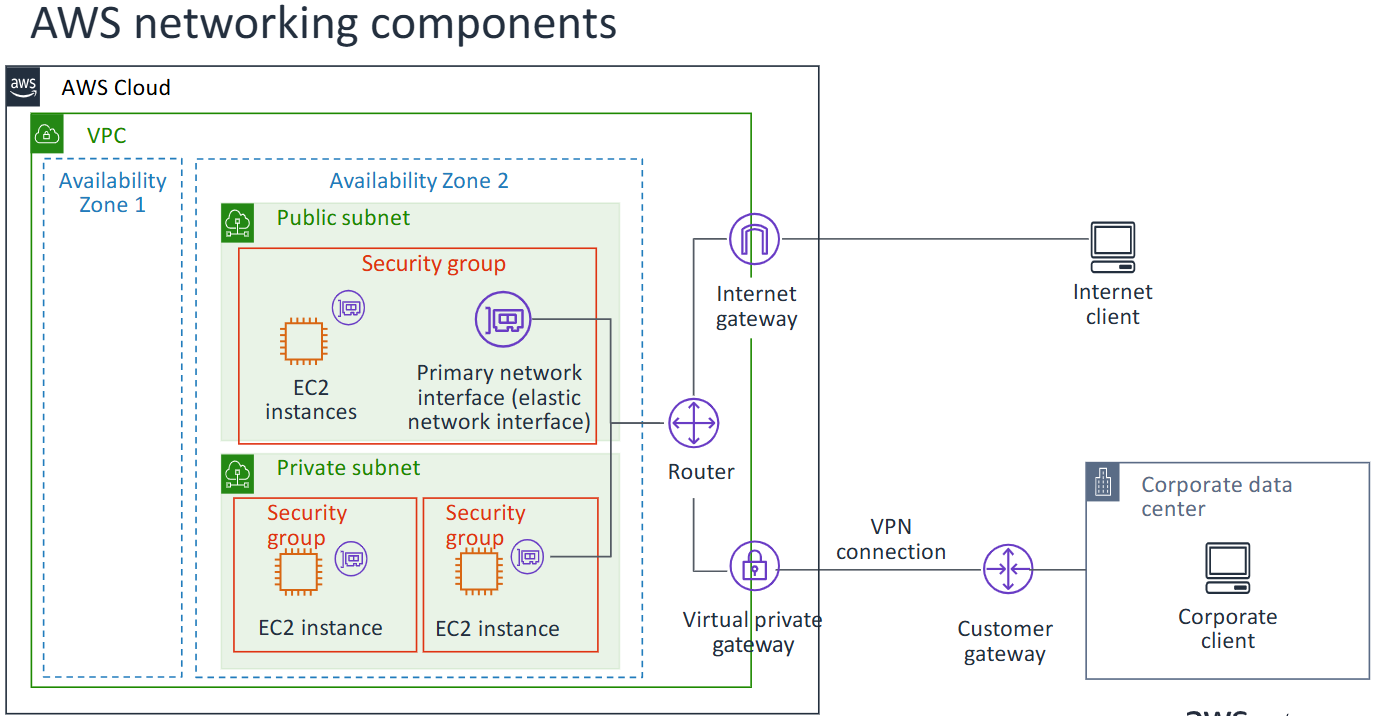

- **subnet** - Logical segments in your VPC. This is the *IP Addresses*.
    - It is a *public* subnet if it is attached to an *Internet gateway*.

- **Security group** - A set of *firewall* rules that secure instances. Block/allow inbound/outbound traffic into an instance.

- **Elastic network interface** - A virtual network interface (NIC) that connects an instance to a network. Each instance in a VPC has the default *primary network interface*.

- **Router** - Routes traffic within the VPC

- **Internet gateway** - VPC component that enables communication between instances in a VPC and the internet.

- **Virtual private gateway** - Defined on the AWS side of a VPN connection. Provides secre and encrypted tunnel between two network endpoints.

- **Customer gateway** - Defined on the client side of a VPN connection

## Amazon VPCs and VPCs

- Virtual network that is provisioned in a logically isolated section of the AWS cloud

- Supports logical separation with subnets
- Offers fine-grained security
- Supports an optional hardware VPN

### IP Addressing

- You can only define networks between /16 and /28 (16-65,536 IP addresses)

- Use non-overlapping IP address ranges
- Restrict VPCs to ranges that are defined in RFC1918 to avoid potential routing issues

### Classless Inter-Domain Routing (CIDR)

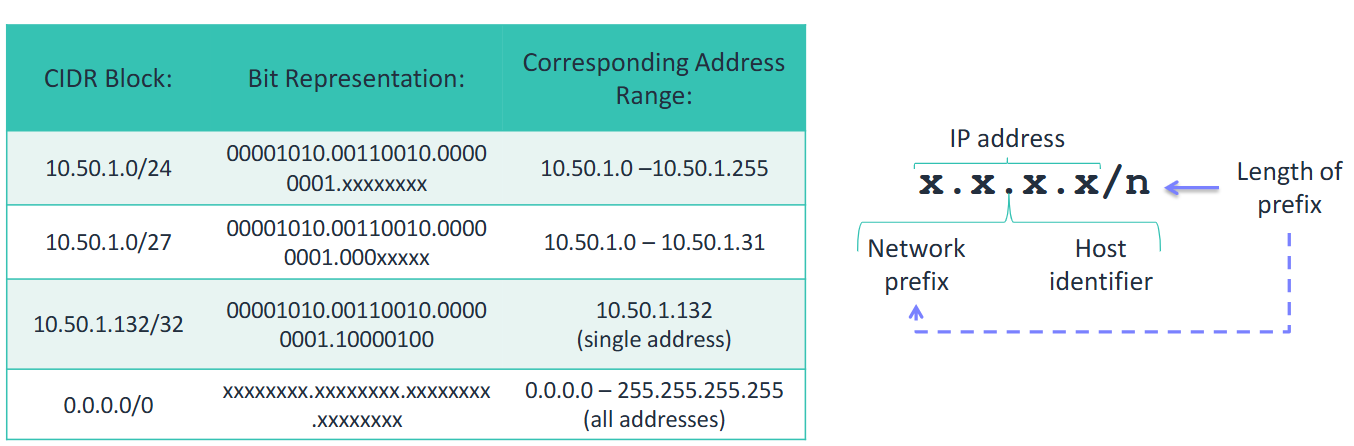

### Creating VPC via CLI

```bash
aws ec2 create-vpc --cider-block 10.0.0.0/16
```

Expected result:

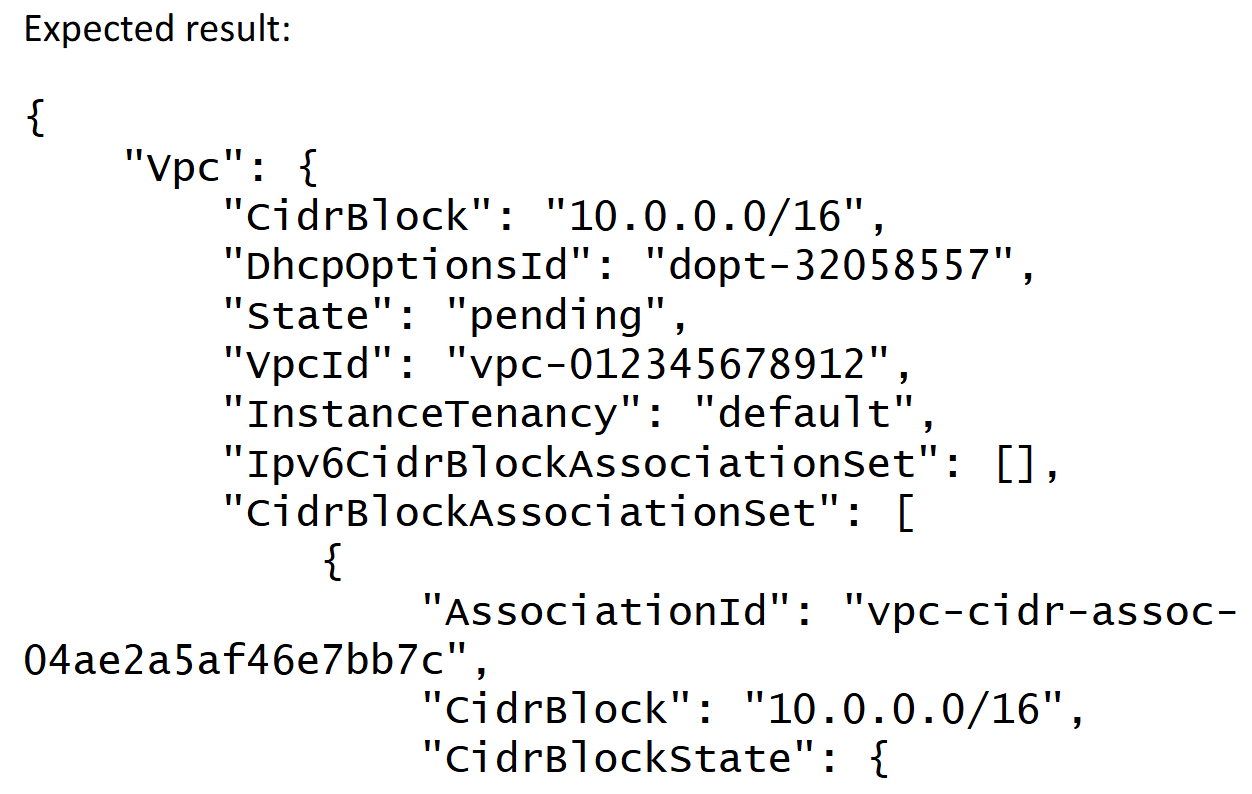

### Amazon VPC Reserved IP Addresses

- It reserves five (5) IP addresses per subnet

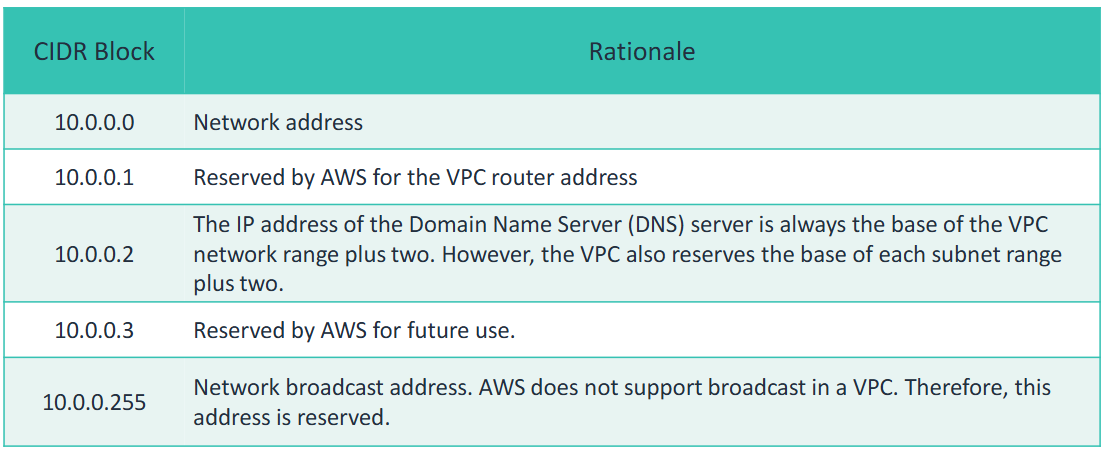

### Characteristics of VPC

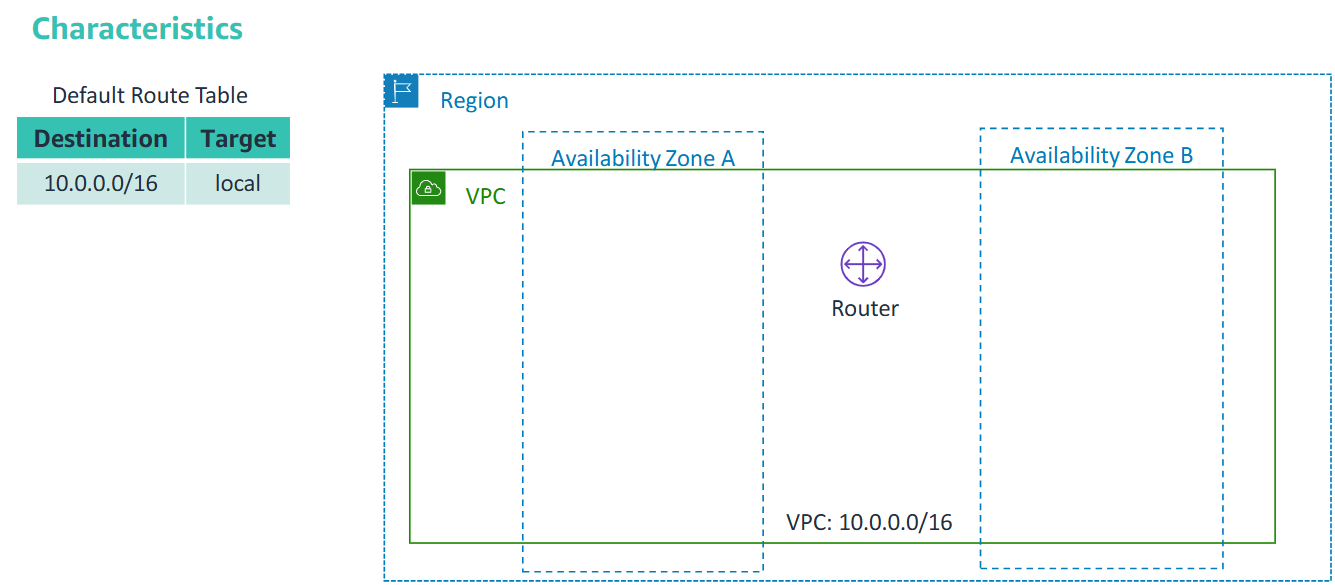

- Can span multiple AZs

- Have implicit router that routes all traffic in the VPC

- Have a default route table that specifies the allowed routes out of the VPC.

## Components of a VPC

### Subnets in VPC

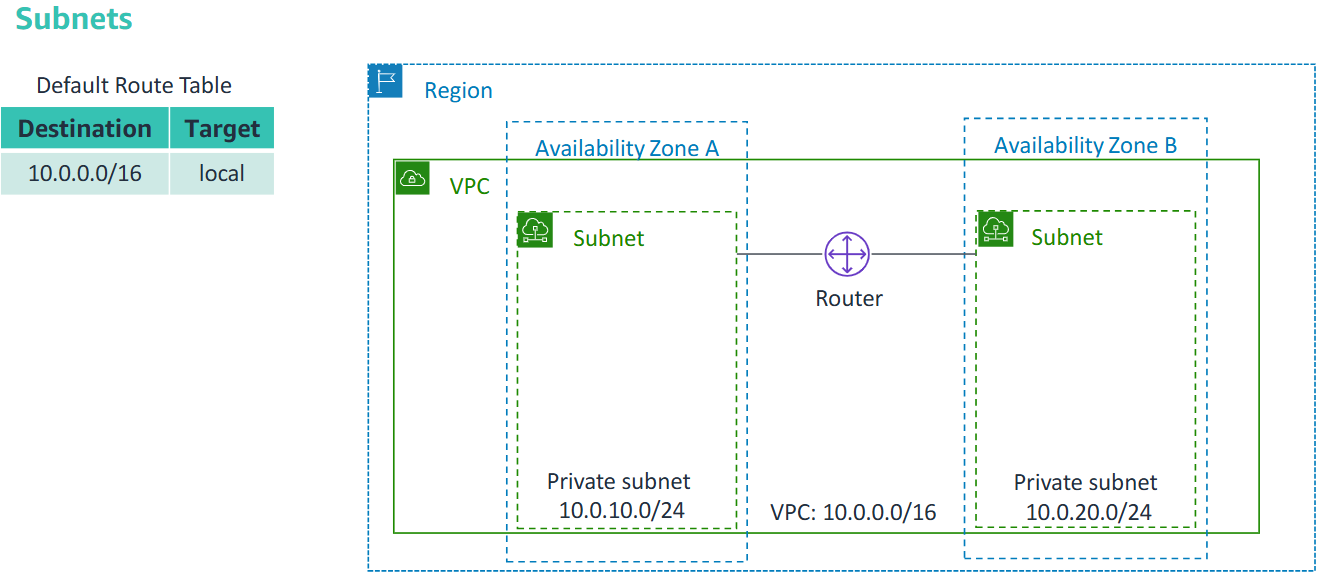

- Up to **200** subnets per VPC can be made

- Subnets can exist in only one (1) AZ
- The address range of its CIDR block must be a subset of its VPC’s address range 
- Subnet CIDR blocks must not overlap 
- Traffic to and from each subnet flows through the implicit router of the VPC.

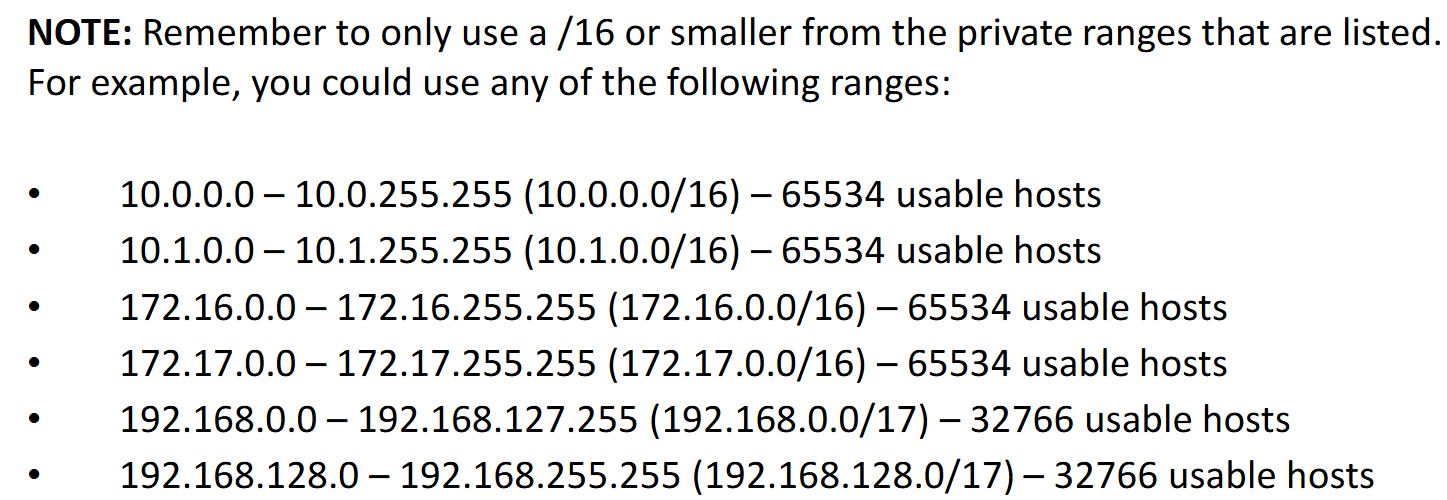

### Route Tables in VPC

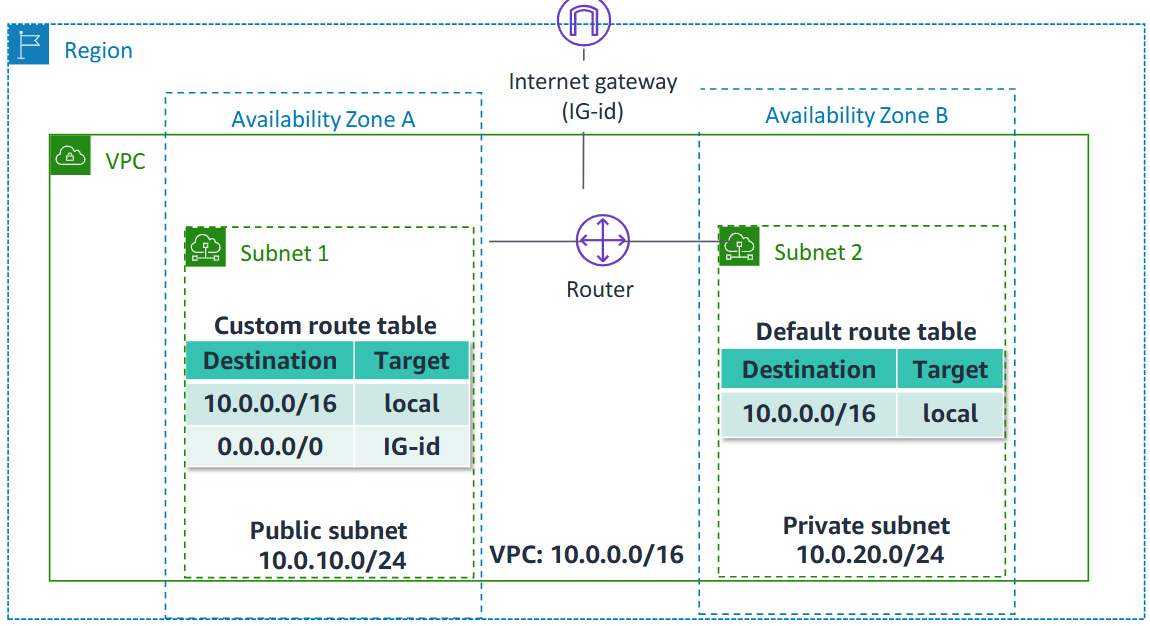

- **Routes** are set of rules that determine where the traffic is sent. It consists of a *destination* and a *target*.
    - Any traffic that goes to *destination* should be routed through *target*.

- Each VPC created has a *default* route table. It has a rule that routes local traffic anywhere wuthin the IP address range of the VPC.
- When you create a subnet, it is automatically associated with the default route table of the VPC

### Elastic Network Interfaces

![Screenshot 2025-10-08 105034.png](<attachment:Screenshot 2025-10-08 105034.png>)

- Virtual NIC attached to an EC2 instance

- The *primary network interface* is the default NIC of each instance in a VPC
- You can't detach a primary ntwork interface from an instance.
- Use cases:
    - Using network and security appliances
    - Creating a management only network interface
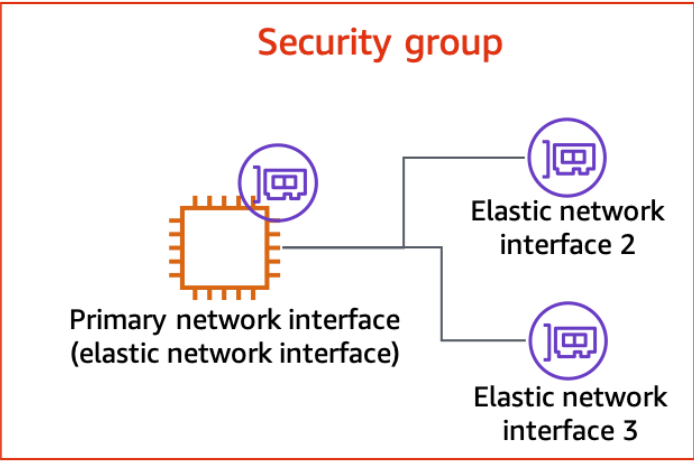

## The Default VPC

- CIDR of **172.31.0.0/16** which means it can store IP addresses 172.31.0.0 - 172.31.255.255

- Has an internet gateway
- Default route table with rules to send traffic to a local route
- A public subnet in each Availability Zone with a /20 size, which provides up to 4,096 addresses. The **auto-assign IP** feature is enable for these subnets.

# VPC Connectivity Options

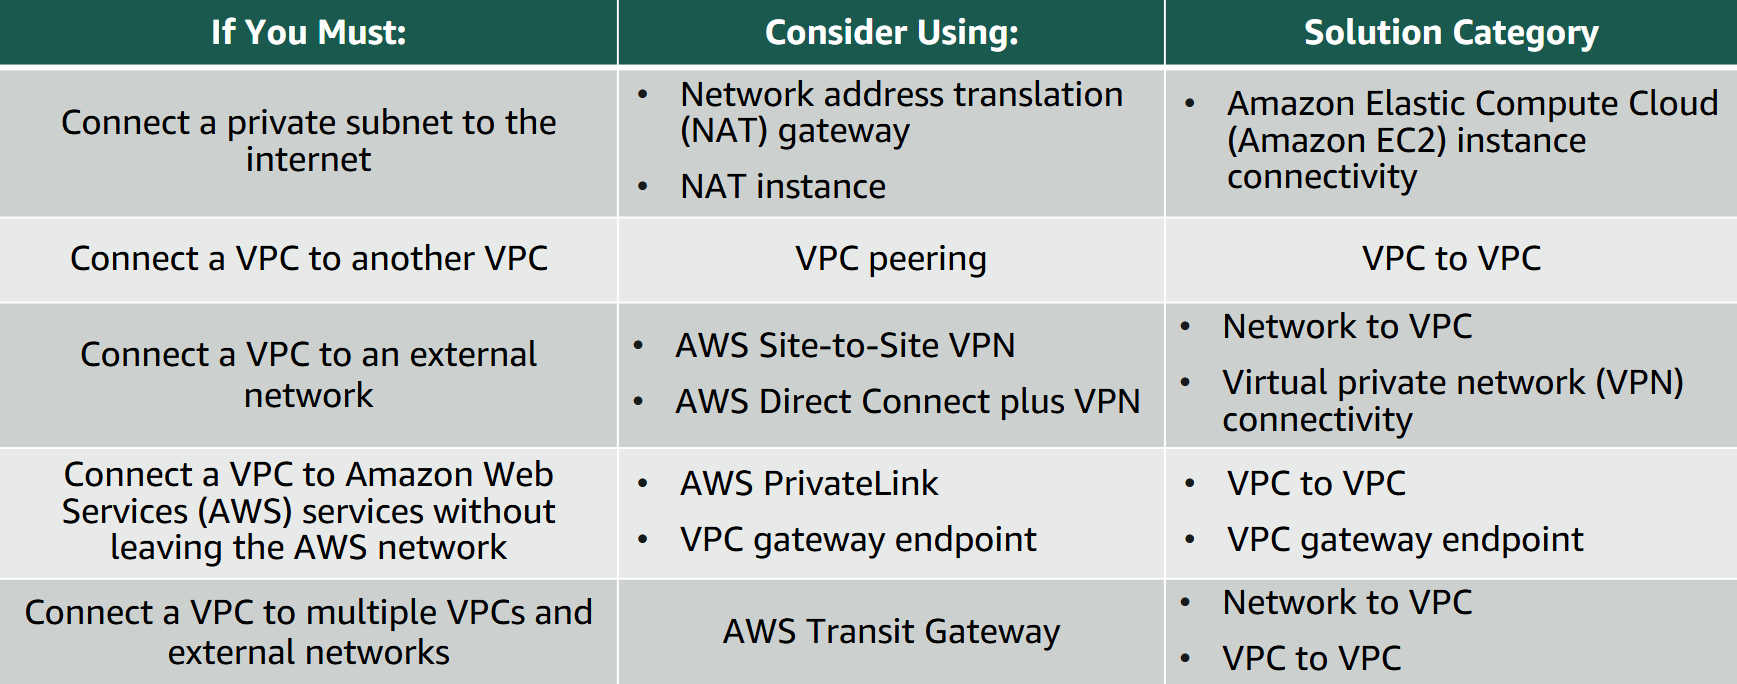

## Connect a Private Subnet to the Internet

### Network Address Translation

- Requires an elastic IP Address

- Supprots TCP, UDP, and ICMP

### Steps to set up NAT

1. Choose public subnet.

2. Assign Elastic IP address to gateway.

3. Update route tables of private subnet to use the gateway.

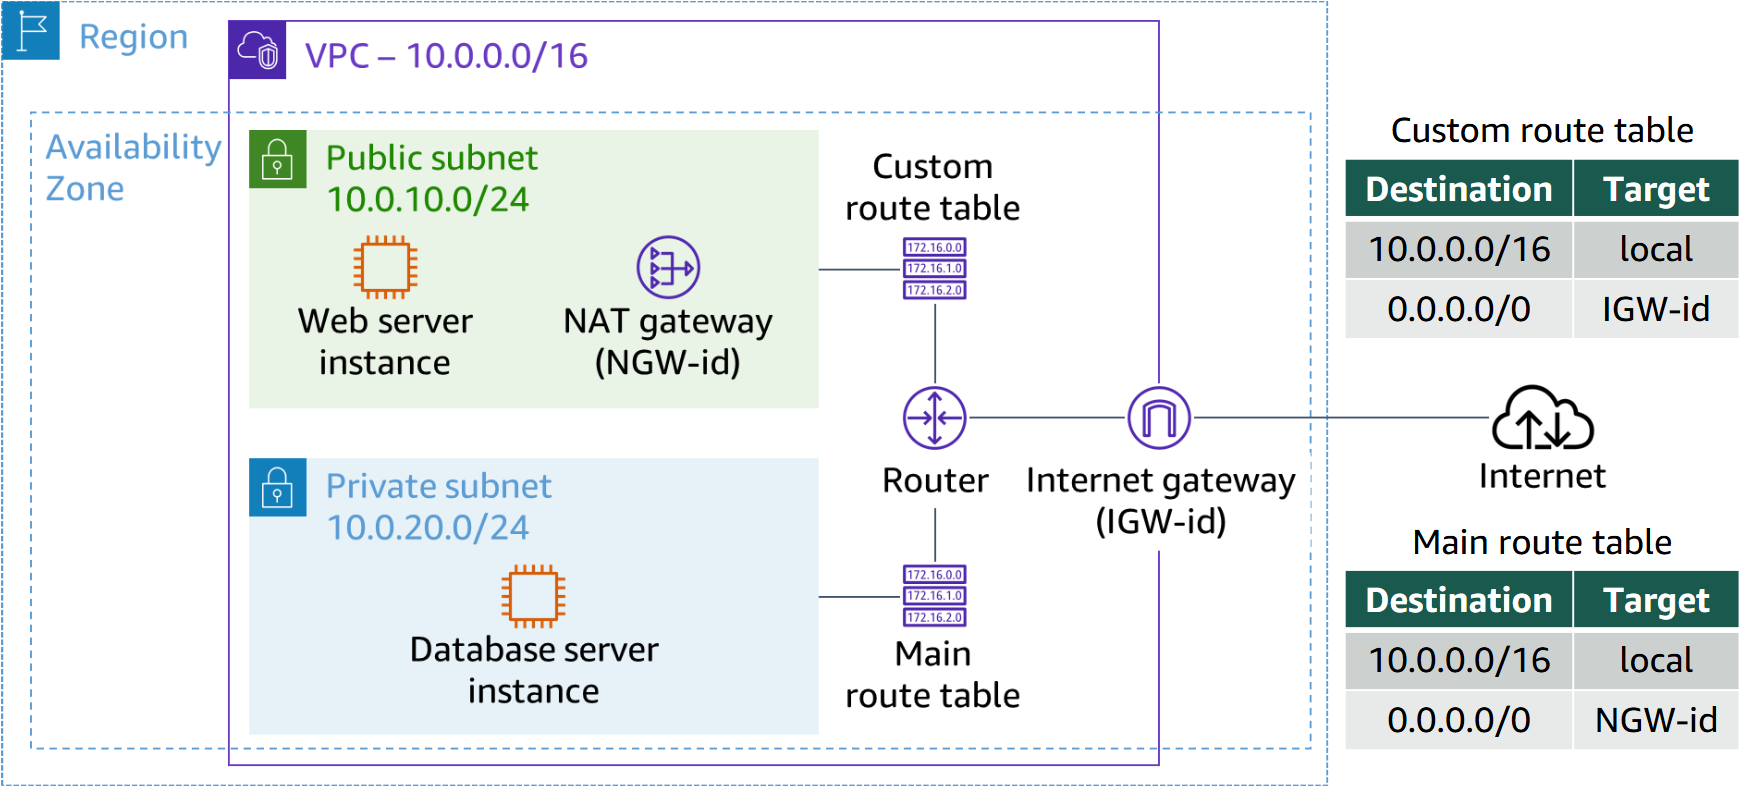

## Connect a VPC to another VPC

### VPC Peering

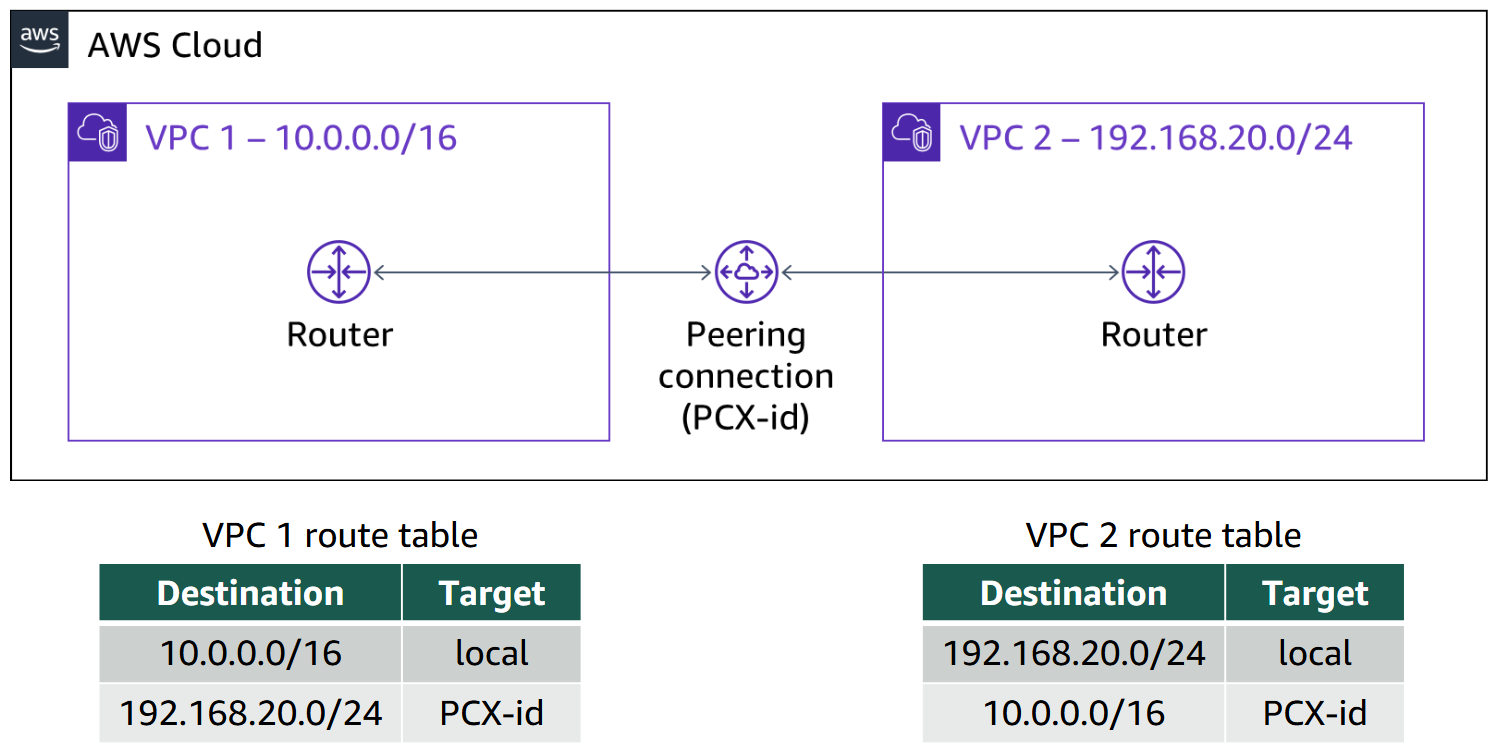

- No overlapping IP Address ranges

- No transitive peering, edge routing, internet gateway access
- No NAT routing between VPCs
- No DNS lookup resolution of private IP addresses
- No cross-referencing of peer security groups across regions

### Creating VPC peering connection

1. owner of the *requester* VPC sends conn. request

2. The owner of the *acceptor* accepts
3. Both owner add route table entries in their VPCs
4. Whenever, owners adjust SG rules
5. Whenever, turn on DNS

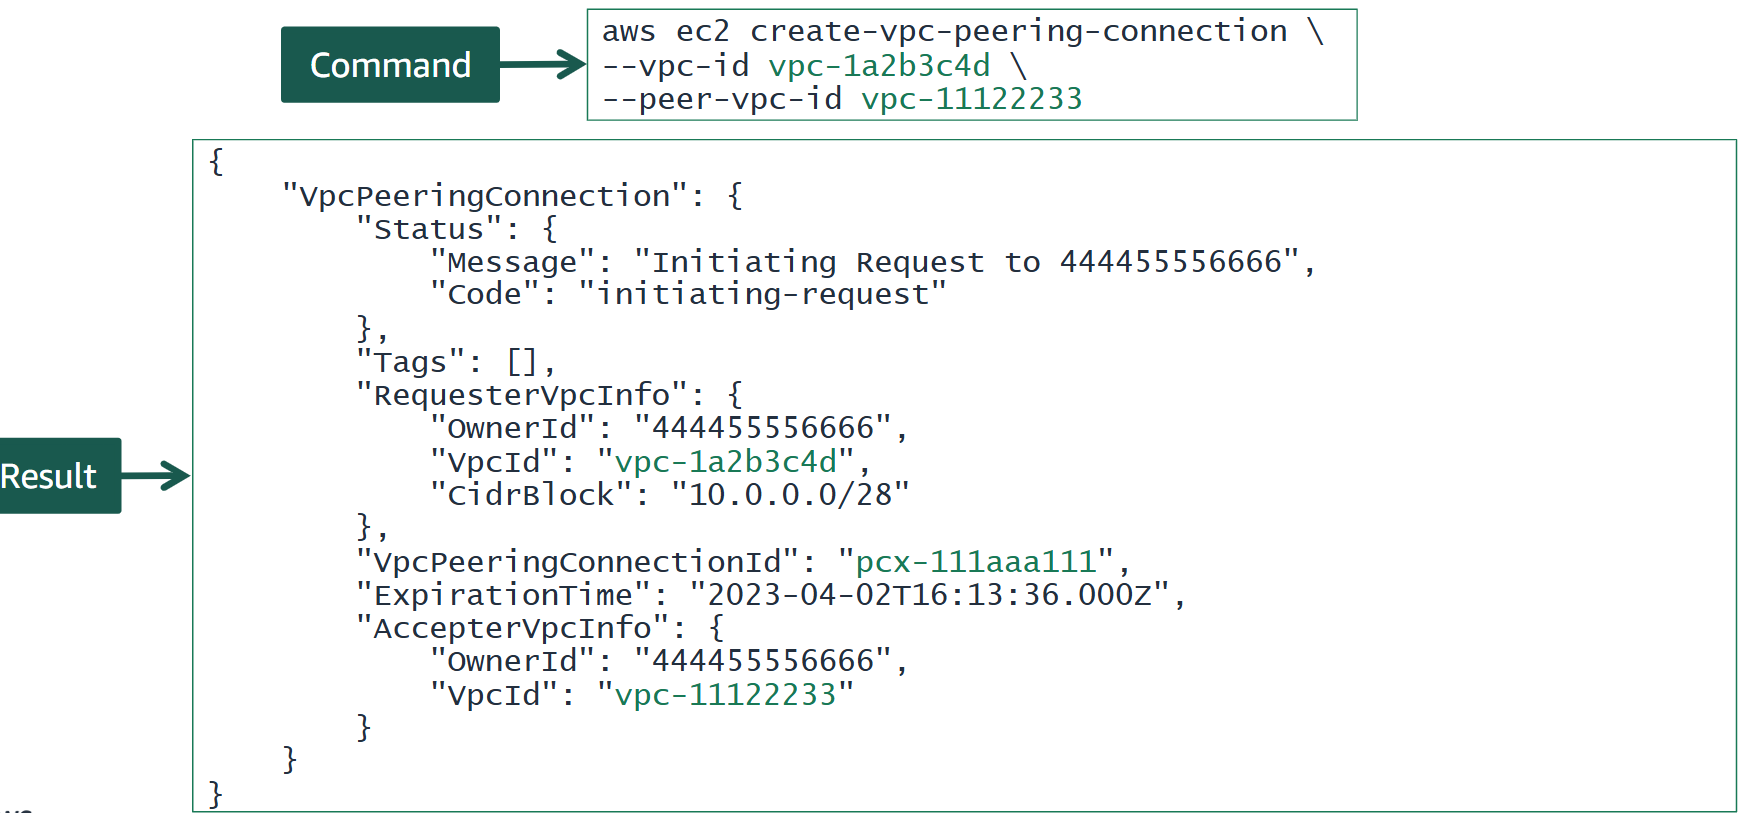

## Connect VPC to an External tetwork

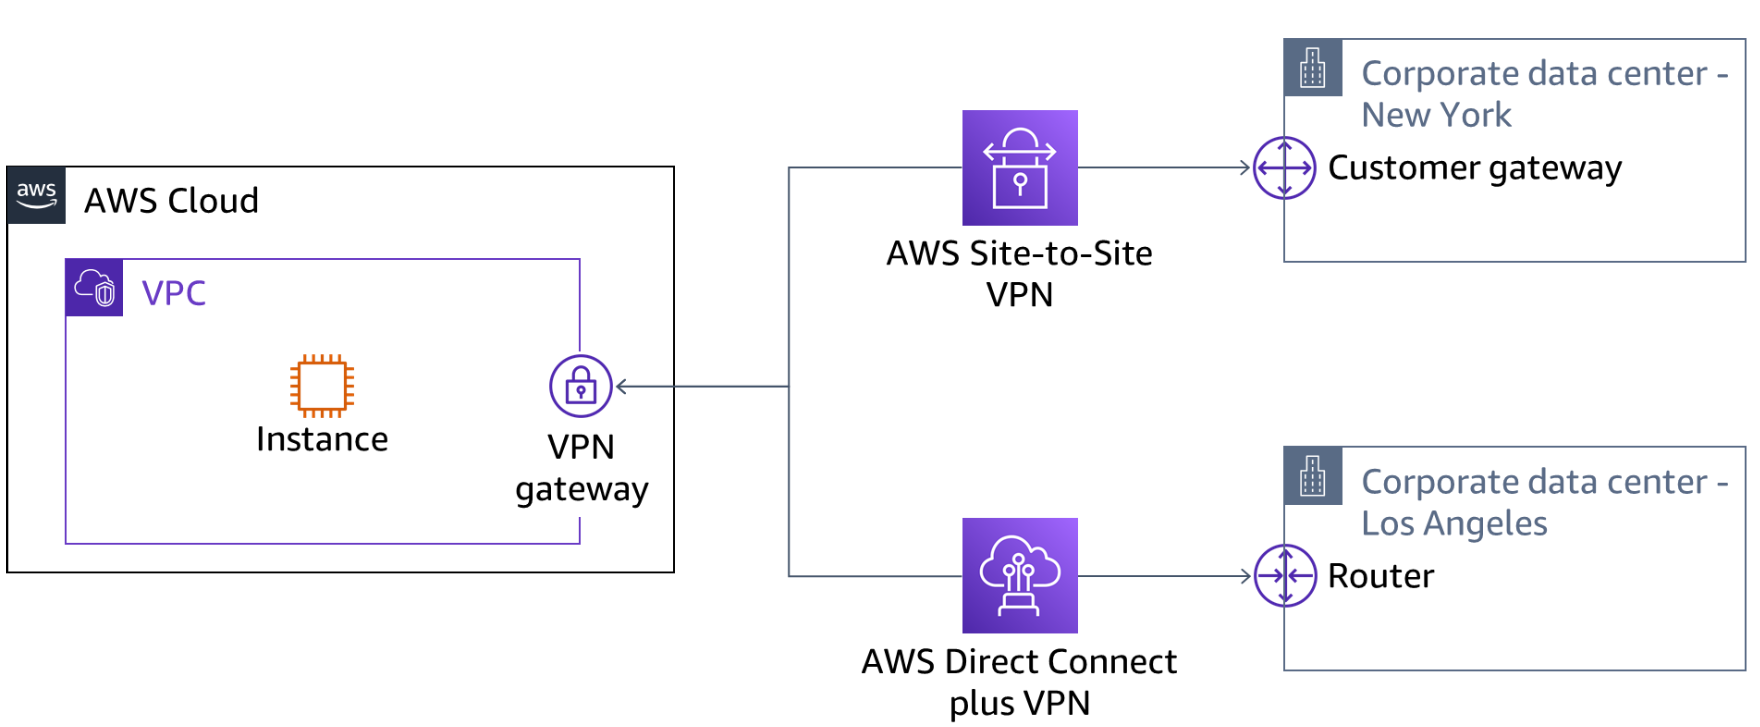

## Connect VPC to AWS Services

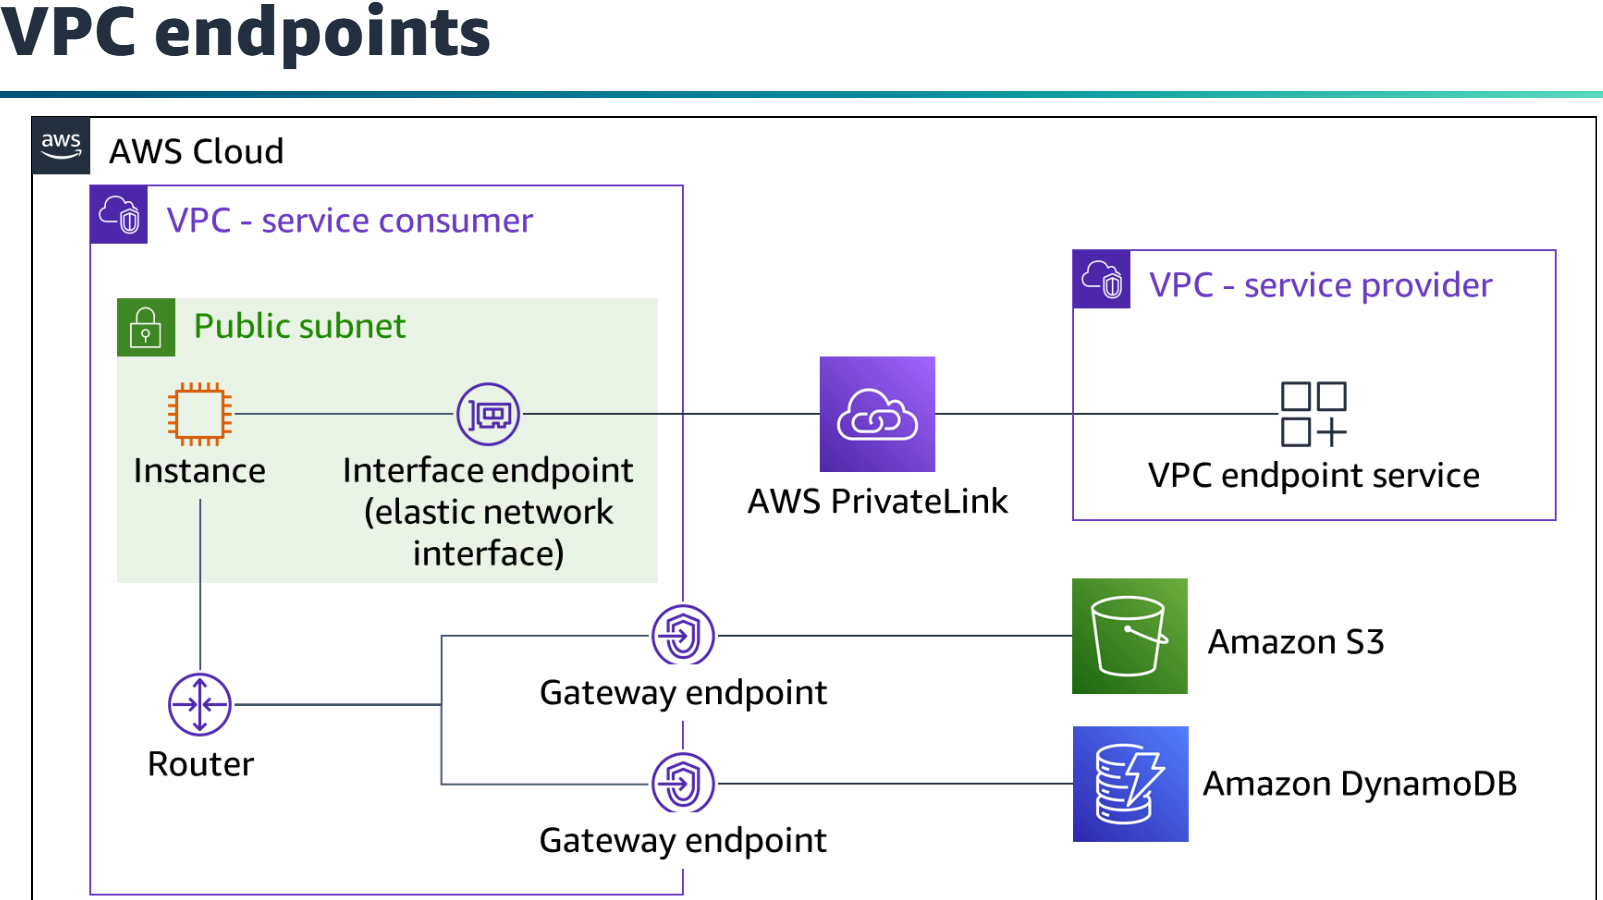

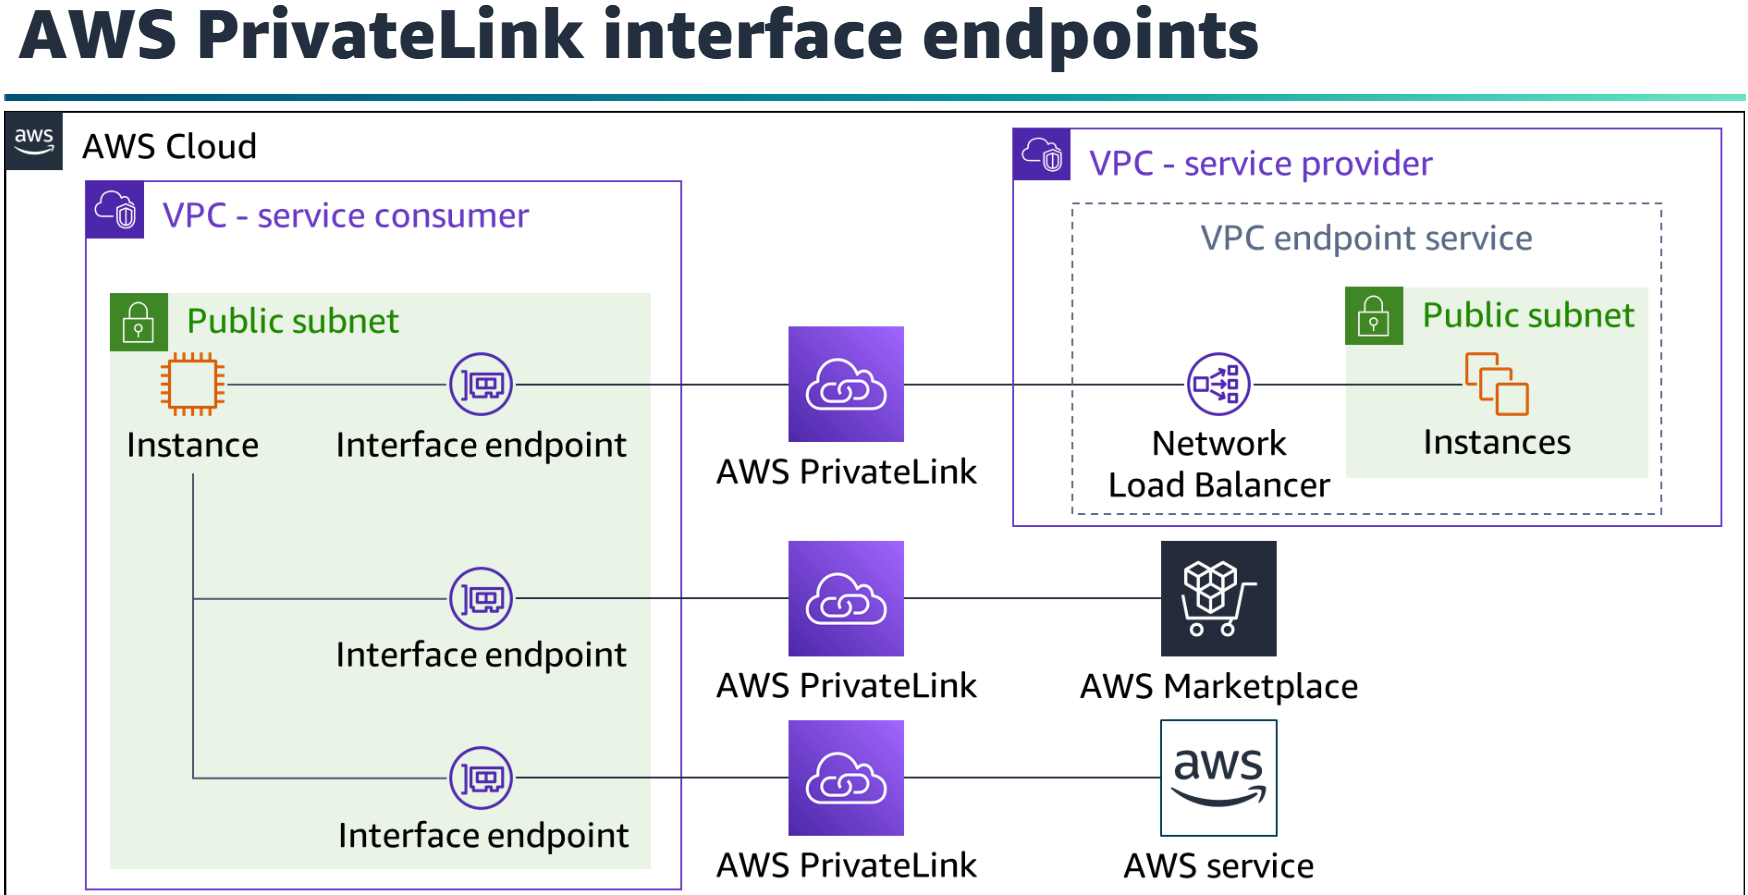

## Connect a VPC to Multiple VPCs and External netowrks

## AWS Transit Gateway

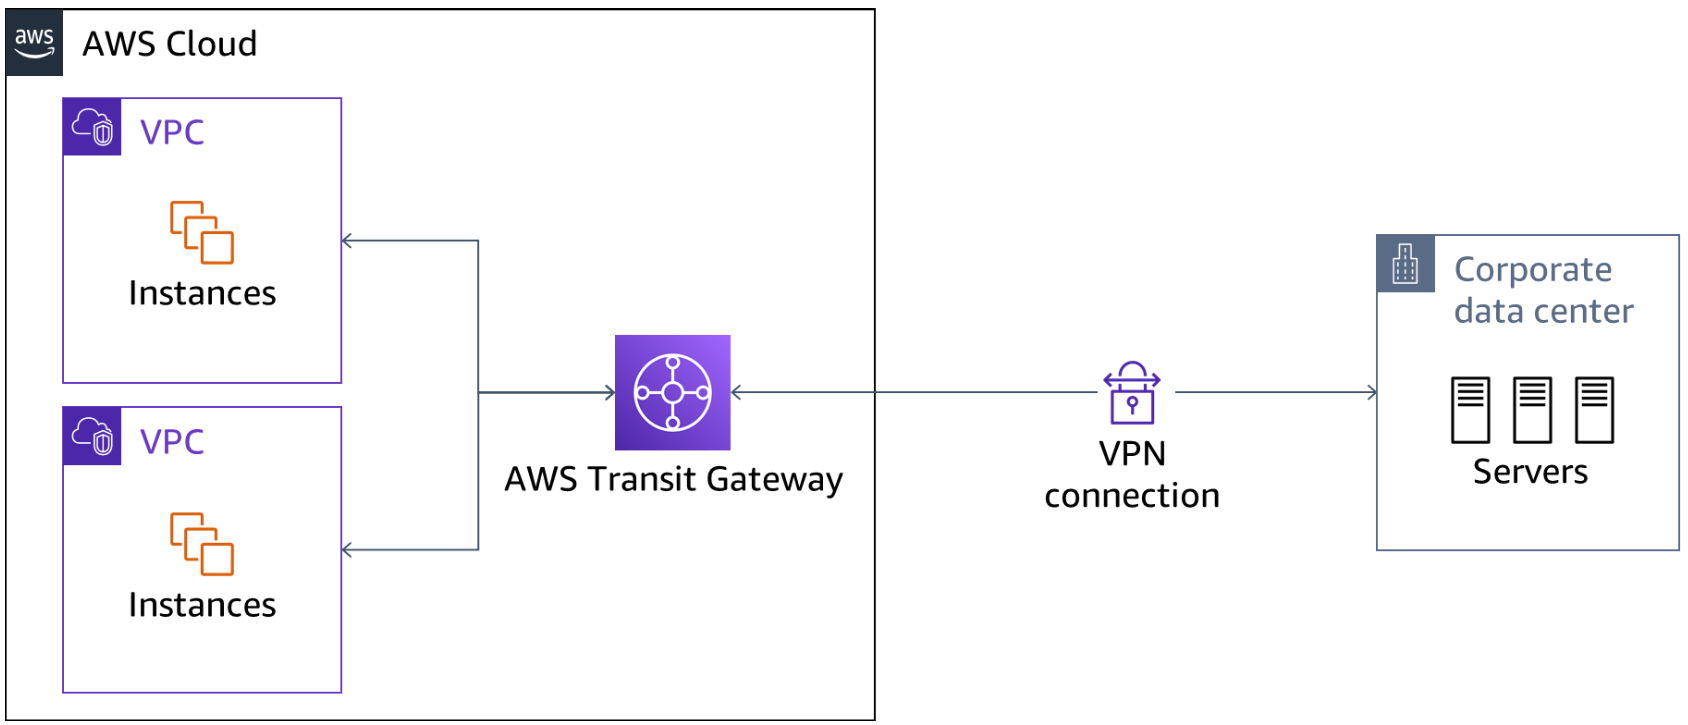

## Checkpoint Questions

- A network administrator wants to connect instances in a VPC to on-premises resources over the internet. The data communication must be encrypted. Which VPC connectivity solution should the administrator use?

    - VPN

- What is the difference between a VPC interface endpoint and a VPC gateway endpoint?

    - An interface endpoint connects to AWS services over *PrivateLink* while the gateway endopint connects to S3 or DynamoDB via *route table* entries

- Why is Transit Gateway the preferred solution for connecting multiple VPCs and VPNs?

    - The transit gateway according to the docs can be used to interconnect VPCs and on-premise networks. All network traffic between AWS data centers is automatically encrypted at the physical layer.

# Securing and Troubleshooting Your Networks

## Securing Your Network

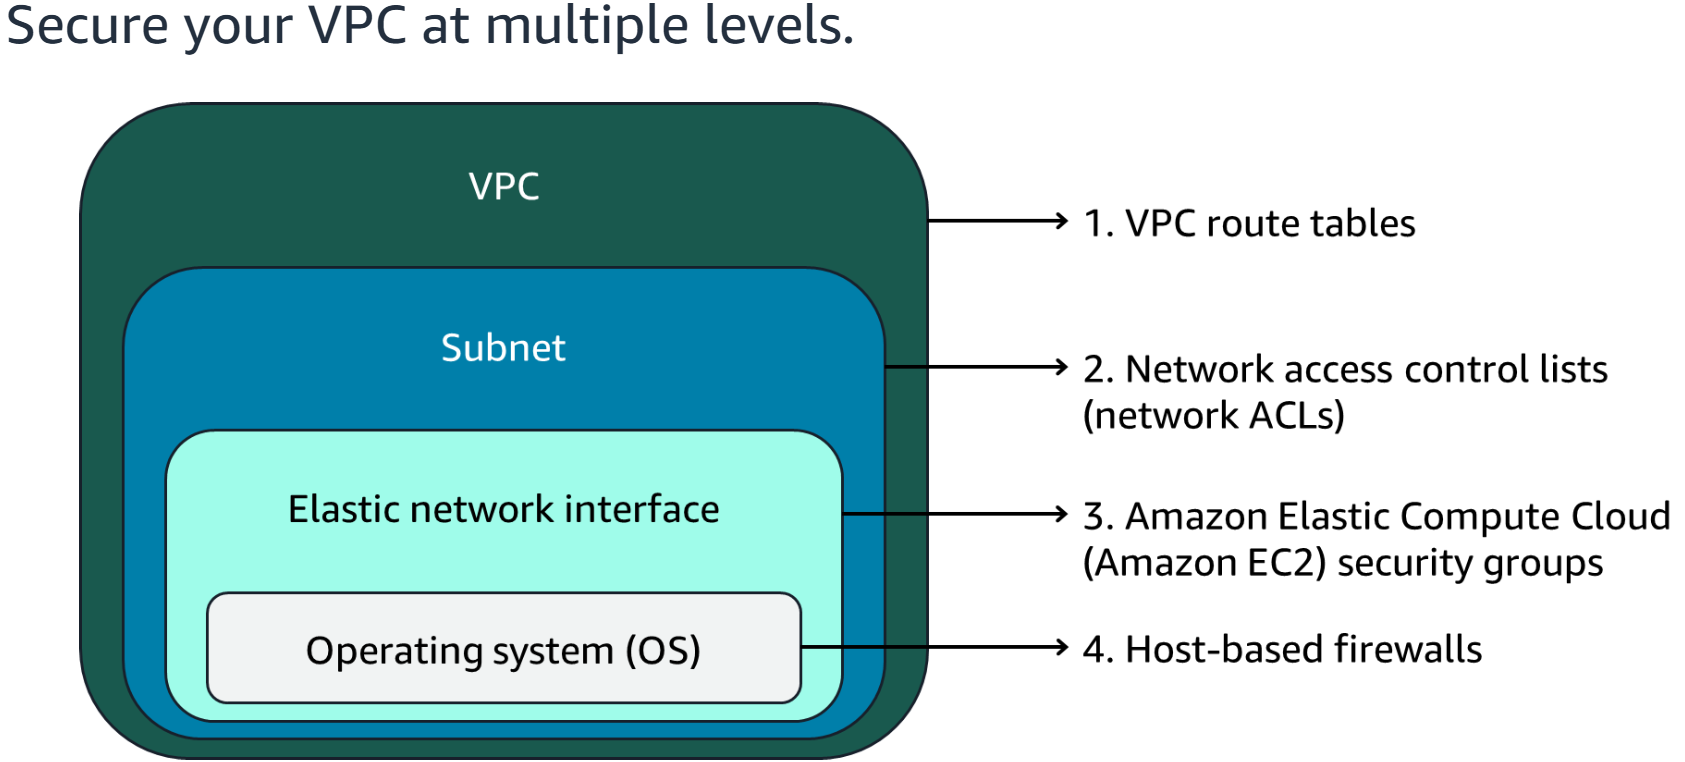

### Network ACLs

- Allows/denies traffic in and out of subnets

- Defines traffic rules in an inbound rules table and outbound rules table
- **Stateless** - Must explicitly allow responses to flow in the opposite direction

### Security Groups

- Allows traffic to/from an elastic network interface

- Also has inbound/outbound rules table
- Configured default: Allow all outbound traffic, deny all inbound traffic
- **Stateful** - If traffic flow == allow, response flow (opposite) == allow

### Bastion Host

- Provides secure access fro a public subnet to a private subnet

- An EC2 instance
- Provides jump point to gain access to instances or resources in a private subnet from the internet
- requires key pair for itself and the private instance to connect

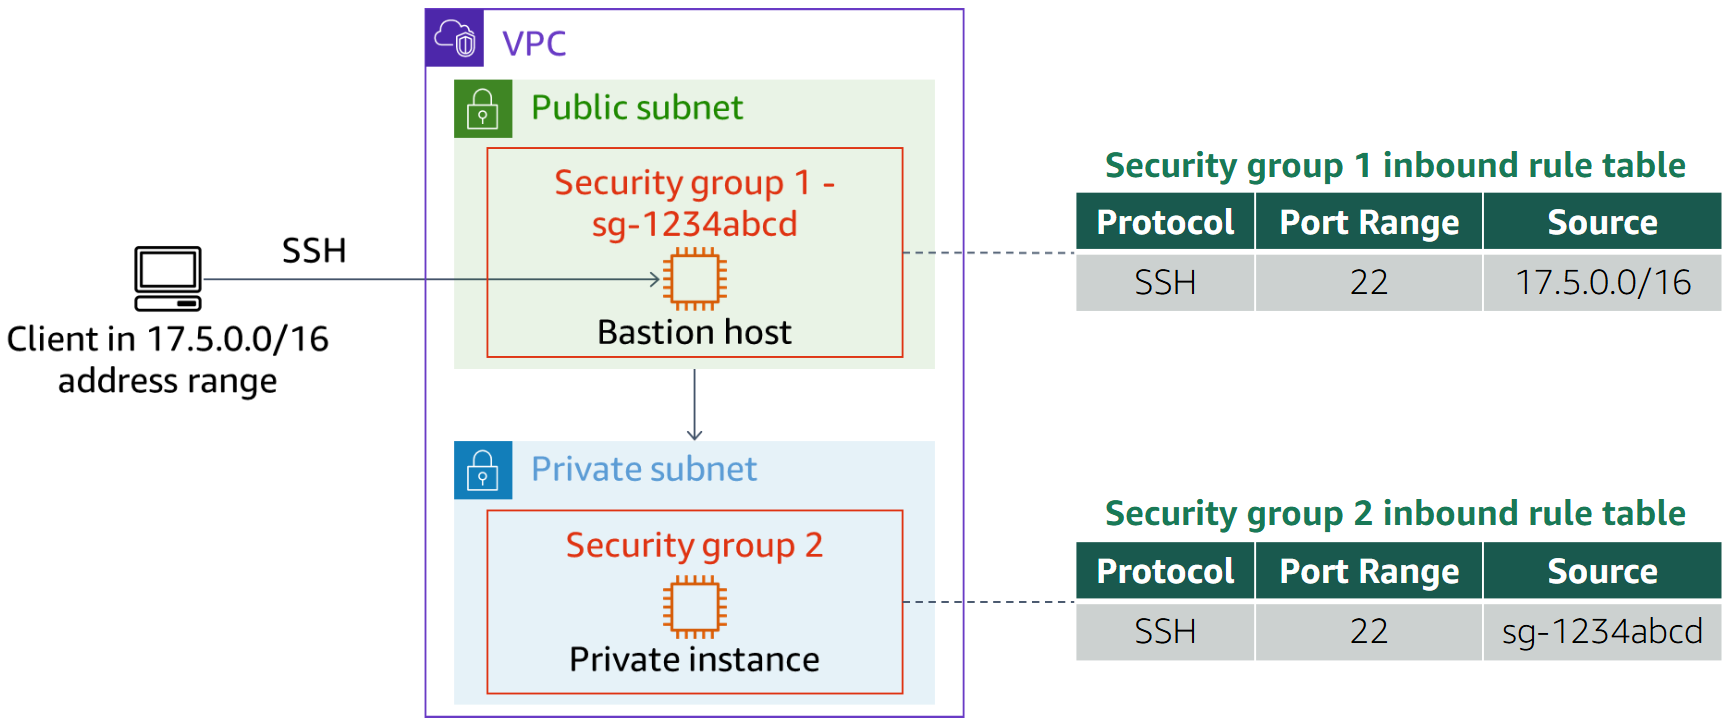

## Troubleshooting Network Connections

### Common Tasks

- Verify `System Status` and `Instance Status`

- Verify the SG and their inbound/outbound rules
- Verify NACLs and their rules
- Verify the route table has destination rules to correct targets
- Verify Public subnet or DNS name
- Verify the instance has Public IP add or Elastic IP Add
- Verify the Internet Gateway is attached to the instance VPC
- Verify the route table has a route for destination/source `0.0.0.0/0` through the Internet gateway

### SSH Connections

- Verify instance IP add. or hostname

- Verify instance connection creds: instance private key, username and pasword.
- Run `AWSSupport-TroubleshootSSH` automation document to help find and resolve problem

### NAT

- verify route table has a route to the NAT instance of NAT gateway

- If using NAT:
    - Verify source/destination check
    - Restart NAT

### VPC Peering

- Ensure peering request approved

- Verify SGs rules allow network traffic between the peered VPCs
- Check whether NACLs incorrectly deny all external traffic

## Checkpoint Questions

1. What are four methods to secure resources inside a VPC?
    - Security Groups, NACLs, Host-based firewalls, VPC endpoints with policies

2. What kind of inbound and outbound traffic does the default security group allow or deny? 
    - Allows all outbound traffic, denies all inbound traffic except from instances associated with the same SG

3. A network ACL is stateless. What does this mean?
    - You must explicitly state whether to allow the flow in the opposite direction if the incoming direction is allowed as well
    
    - You must set the inbound and outbound rules separately.

# Lab 180 - Configuring an Amazon VPC

# Lab 181 - Troubleshoot a VPC

# Knowledge Check

1. Which connectivity option for a VPC allows a private subnet to connect to the internet

- NAT gateway

2. A network engineer is troubleshooting network issues inside a VPC, and want sto capture data about the IP traffic. What VPC feature should he use?

- VPC Flow Logs

3. Which type of rule should you add to the rule tables of a NACL

- All allow/deny rules 

4. Describe security groups

- Stateful
- They are applied to a group of services in a VPCn Elastic Network Interface
- No priority between which application protocol

5. A logical newtork segment in a VPC existing in one AZ

- Subnet